<a href="https://colab.research.google.com/github/Mharishankar1/CodSoft-ML/blob/main/SPAM_TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SPAM CLASSIFICATION


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
 df = pd.read_csv('spam.csv', encoding='latin1')

In [ ]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [ ]:
print("\nDistribution of 'label' variable:")
print(df['v1'].value_counts())


Distribution of 'label' variable:
v1
ham     4825
spam     747
Name: count, dtype: int64


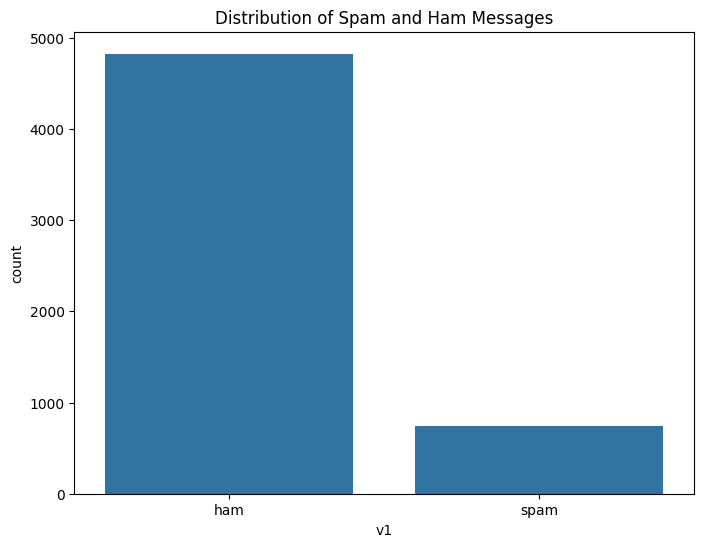

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='v1', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.show()

In [ ]:
 df = df.rename(columns={'v1': 'label', 'v2': 'message'})

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

SVM Accuracy: 0.9794
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Logistic Regression Accuracy: 0.9525
Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Naive Bayes Accuracy: 0.9839
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy              

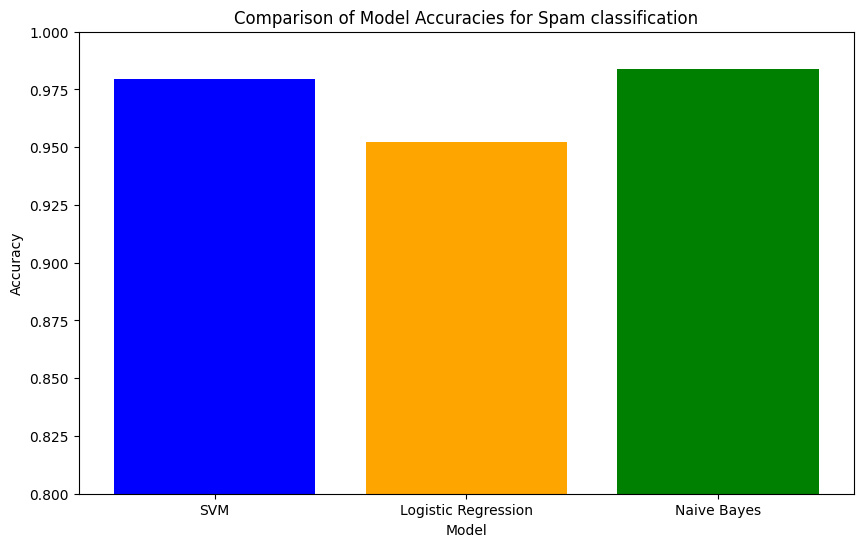

The best model is: Naive Bayes with accuracy 0.9839


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
count_vectorizer = CountVectorizer(stop_words='english')
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)
models = {
    'SVM': SVC(C=1.0, kernel='linear'),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB()
}

results = {}
for name, model in models.items():
    if name == 'Naive Bayes':
        model.fit(X_train_counts, y_train)
        y_pred = model.predict(X_test_counts)
    else:
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies for Spam classification')
plt.ylim(0.8, 1.0)
plt.show()
best_model = max(results, key=results.get)
print(f"The best model is: {best_model} with accuracy {results[best_model]:.4f}")


In [ ]:
user_message = input("Enter the message to classify: ")

Enter the message to classify: hi


In [ ]:

message_tfidf = tfidf_vectorizer.transform([user_message])

best_model_object = models[best_model]
prediction = best_model_object.predict(message_tfidf)

print("Prediction:", prediction)


Prediction: ['ham']
